# Data Wrangling Project

## WeRateDogs Twitter Data

## Table of Contents
<ul>
<li><a>Data Wrangling</a></li>    
<ul>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
    <li><a href="#cleaning">Cleaning Data</a></li>
</ul>   
<li><a href="#story">Storing, analizing and vizualizing wrangled data</a></li>
</ul>

In [53]:
# Import packages


import pandas as pd
import requests
import os
import time
import tweepy
import json
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gathering'></a>
## Data Wrangling

### Gathering Data

##### Load twitter archive

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# We will print shape and see first rows
print(twitter_archive.shape)

twitter_archive.head()

(2356, 17)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### Get tweet image predictions using request library

In [3]:
#Using requests to import the other file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
# We will print shape and see first rows
print(image_predictions.shape)
image_predictions.head()

(2075, 12)


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Get twitter data via API

In [5]:
#Use the twitter Apis to import the JSON
#Please note that I only run this code first time for scraping data

consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

#After scraping I deleted my api data. Complete with yours if you want to scrape 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Now we've loaded our API, we are going to try if it scrapes data. First we will try with a single [Donald Trump](https://twitter.com/realDonaldTrump/status/1257714716492722176) tweet

In [6]:
id_of_tweet = '1257714716492722176'
tweet = api.get_status(id_of_tweet, tweet_mode='extended')
print(tweet._json)

{'created_at': 'Tue May 05 16:52:10 +0000 2020', 'id': 1257714716492722176, 'id_str': '1257714716492722176', 'full_text': 'For the constant criticism from the Do Nothing Democrats and their Fake News partners, here is the newest chart on our great testing “miracle" compared to other countries. Dems and LameStream Media should be proud of the USA, instead of always ripping us down! https://t.co/8AwnPCNchF', 'truncated': False, 'display_text_range': [0, 260], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1257714695009472513, 'id_str': '1257714695009472513', 'indices': [261, 284], 'media_url': 'http://pbs.twimg.com/media/EXRM2fjUEAEq5w9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EXRM2fjUEAEq5w9.jpg', 'url': 'https://t.co/8AwnPCNchF', 'display_url': 'pic.twitter.com/8AwnPCNchF', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1257714716492722176/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize'

Seems to work! Now we will use all the tweet ids of the twitter archive we've got to scrape those tweets and store in Json.

In [6]:
tweetid_series = twitter_archive["tweet_id"]

In [11]:
#Please note that I only run this code first time for scraping data
tweet_data = {}
for tweet in tweetid_series:
    try:
        tweet_status = api.get_status(tweet,
                                      tweet_mode='extended',
                                      wait_on_rate_limit=True,
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
# There may be deleted tweets, so we add and except that print the tweet_id of those possible deleted tweets        
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096


Rate limit reached. Sleeping for: 536


Error for: 758467244762497024
Error for: 754011816964026368
Error for: 680055455951884288


Rate limit reached. Sleeping for: 532


Error for: 676946864479084545


In [12]:
tweet_data

{'892420643555336193': {'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h':

In [13]:
# Write tweet_json.txt 
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [7]:
# Now open tweet_json.txt and store in df
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])

# We will print shape and see first rows
print(tweets_df.shape)
tweets_df.head()

(2329, 3)


tweet_id  retweets  favorites
0  892420643555336193      7727      36304
1  892177421306343426      5719      31303
2  891815181378084864      3785      23577
3  891689557279858688      7888      39616
4  891327558926688256      8508      37820

<a id='assessing'></a>
## Data Wrangling

### Assessing Data

Now we have 3 dataframes we are going to work with:

* twitter_archive: tweet text, rating, dog category, etc.

* image_predictions: contains neural network that identifies the breed of certain dogs in a tweet picture

* tweets_df: contains tweet_id, retweets and favorites

First, we will inspect info of every df and check summary statistics. We will again print heads to inspect data

In [8]:
twitter_archive.info()
twitter_archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [9]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [10]:
image_predictions.info()
image_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [11]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [12]:
tweets_df.info()
tweets_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id     2329 non-null object
retweets     2329 non-null int64
favorites    2329 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


retweets      favorites
count   2329.000000    2329.000000
mean    2713.872477    7587.335337
std     4589.429380   11773.451140
min        1.000000       0.000000
25%      549.000000    1323.000000
50%     1273.000000    3299.000000
75%     3158.000000    9299.000000
max    78095.000000  156722.000000

If a tweet has no retweets or if its value is null, it is possible that the tweet is actually a RT. As we see we don't have those kind of cases in tweets_df 

How many duplicated tweets do we have?

In [13]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [14]:
tweets_df[tweets_df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweets, favorites]
Index: []

In [15]:
image_predictions[image_predictions.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

We don't have repeated tweets in out dataframes. We can certainly know that because we know every tweet id is unique!

In [16]:
image_predictions[image_predictions.jpg_url.duplicated()]

tweet_id                                            jpg_url  \
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1315  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349  759566828574212096    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
...                  ...                                                ...   
1903  851953902622658560    https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg   
1944  861769973181624320    https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg   
1992  873697596434513921    https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg   
2041  885311592912609280    https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   

      img_num                         p1   p1_conf  p1_dog  \
1297        1                    upright  0.303415   False   
1315        1                        pug  0.272205    True   
1333        2               cash_machine  0.802333   False   
1345        1              Irish_terrier  0.254856    True   
1349        1         Labrador_retriever  0.967397    True   
...       ...                        ...       ...     ...   
1903        1  Staffordshire_bullterrier  0.757547    True   
1944        2              Arabian_camel  0.366248   False   
1992        1                     laptop  0.153718   False   
2041        1         Labrador_retriever  0.908703    True   
2055        2                   Pembroke  0.809197    True   

                                  p2   p2_conf  p2_dog  \
1297                golden_retriever  0.181351    True   
1315                    bull_mastiff  0.251530    True   
1333                      schipperke  0.045519    True   
1345                          briard  0.227716    True   
1349                golden_retriever  0.016641    True   
...                              ...       ...     ...   
1903  American_Staffordshire_terrier  0.149950    True   
1944                     house_finch  0.209852   False   
1992                  French_bulldog  0.099984    True   
2041                       seat_belt  0.057091   False   
2055             Rhodesian_ridgeback  0.054950    True   

                               p3   p3_conf  p3_dog  
1297             Brittany_spaniel  0.162084    True  
1315                   bath_towel  0.116806   False  
1333              German_shepherd  0.023353    True  
1345  soft-coated_wheaten_terrier  0.223263    True  
1349                     ice_bear  0.014858   False  
...                           ...       ...     ...  
1903     Chesapeake_Bay_retriever  0.047523    True  
1944               cocker_spaniel  0.046403    True  
1992                      printer  0.077130   False  
2041                          pug  0.011933    True  
2055                       beagle  0.038915    True  

[66 rows x 12 columns]

##### Lets inspect more about twitter_archive!

If we count the names we will see "a" appears 55 times and none 745!

In [17]:
twitter_archive.name.value_counts().head(10)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

Let's print some of those dogs that appear as None

In [18]:
twitter_archive[twitter_archive.name.str.contains('None')][:4]


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5   891087950875897856                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   

                    timestamp  \
5   2017-07-29 00:08:17 +0000   
7   2017-07-28 00:22:40 +0000   
12  2017-07-25 01:55:32 +0000   
24  2017-07-18 16:08:03 +0000   

                                               source  \
5   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
24  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
5   Here we have a majestic great white breaching ...                  NaN   
7   When you watch your owner call another dog a g...                  NaN   
12  Here's a puppo that seems to be on the fence a...                  NaN   
24  You may not have known you needed to see this ...                  NaN   

    retweeted_status_user_id retweeted_status_timestamp  \
5                        NaN                        NaN   
7                        NaN                        NaN   
12                       NaN                        NaN   
24                       NaN                        NaN   

                                        expanded_urls  rating_numerator  \
5   https://twitter.com/dog_rates/status/891087950...                13   
7   https://twitter.com/dog_rates/status/890729181...                13   
12  https://twitter.com/dog_rates/status/889665388...                13   
24  https://twitter.com/dog_rates/status/887343217...                13   

    rating_denominator  name doggo floofer pupper  puppo  
5                   10  None  None    None   None   None  
7                   10  None  None    None   None   None  
12                  10  None  None    None   None  puppo  
24                  10  None  None    None   None   None

**Lets randomly compare rating numerator and dominator in text and numerator and denominator column in the archive**

In [38]:
random.choice(twitter_archive.text.tolist()), random.choice(twitter_archive.rating_numerator.tolist()), \
random.choice(twitter_archive.rating_denominator.tolist())

("This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd",
 11,
 10)

This is a quality problem we will have to solve 

**Lets inspect rating_denominator to see if they are in order**

In [72]:
twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [76]:
print("So we have " + str(twitter_archive[twitter_archive["rating_denominator"] != 10].shape[0]) + " denominators that haven't got base 10")

So we have 23 denominators that haven't got base 10


There are a lot of nones as Name, lets check if there are mistakes at the computation of names

In [19]:
twitter_archive.loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name'))]


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
852   765395769549590528                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   

                      timestamp  \
852   2016-08-16 03:52:26 +0000   
1853  2015-12-12 15:59:51 +0000   
1955  2015-12-06 22:54:44 +0000   
2034  2015-12-01 17:30:22 +0000   
2066  2015-11-30 02:01:49 +0000   
2116  2015-11-28 02:20:27 +0000   
2125  2015-11-27 22:01:40 +0000   
2128  2015-11-27 18:09:09 +0000   
2146  2015-11-26 16:59:01 +0000   
2161  2015-11-25 17:13:02 +0000   
2191  2015-11-24 00:54:05 +0000   
2204  2015-11-23 03:46:18 +0000   
2218  2015-11-22 19:13:05 +0000   
2235  2015-11-21 20:59:20 +0000   
2249  2015-11-21 00:25:26 +0000   
2255  2015-11-20 18:35:10 +0000   
2264  2015-11-20 03:04:08 +0000   
2273  2015-11-19 22:32:36 +0000   
2287  2015-11-19 03:10:02 +0000   
2304  2015-11-18 14:18:59 +0000   
2311  2015-11-18 00:55:42 +0000   
2314  2015-11-17 19:35:19 +0000   

                                                 source  \
852   <a href="http://twitter.com/download/iphone" r...   
1853  <a href="http://twitter.com/download/iphone" r...   
1955  <a href="http://twitter.com/download/iphone" r...   
2034  <a href="http://twitter.com/download/iphone" r...   
2066  <a href="http://twitter.com/download/iphone" r...   
2116  <a href="http://twitter.com/download/iphone" r...   
2125  <a href="http://twitter.com/download/iphone" r...   
2128  <a href="http://twitter.com/download/iphone" r...   
2146  <a href="http://twitter.com/download/iphone" r...   
2161  <a href="http://twitter.com/download/iphone" r...   
2191  <a href="http://twitter.com/download/iphone" r...   
2204  <a href="http://twitter.com/download/iphone" r...   
2218  <a href="http://twitter.com/download/iphone" r...   
2235  <a href="http://twitter.com/download/iphone" r...   
2249  <a href="http://twitter.com/download/iphone" r...   
2255  <a href="http://twitter.com" rel="nofollow">Tw...   
2264  <a href="http://twitter.com" rel="nofollow">Tw...   
2273  <a href="http://twitter.com" rel="nofollow">Tw...   
2287  <a href="http://twitter.com/download/iphone" r...   
2304  <a href="http://twitter.com/download/iphone" r...   
2311  <a href="http://twitter.com/download/iphone" r...   
2314  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
852   This is my dog. Her name is Zoey. She knows I'...                  NaN   
1853  This is a Sizzlin Menorah spa

Most of tweets of our archive have Iphone Twitter App as source

In [21]:
twitter_archive.source.value_counts().head(10)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Lets inspect more about image_predictions!

In [22]:
image_predictions.p1.value_counts()[:20]

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Name: p1, dtype: int64

In [23]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
affenpinscher           1
Madagascar_cat          1
screw                   1
coral_reef              1
Name: p2, Length: 405, dtype: int64

In [24]:
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
screw                  1
axolotl                1
bow                    1
barber_chair           1
boathouse              1
Name: p3, Length: 408, dtype: int64

**Quality issues**

twitter_archive table

1- Dog names in twitter_archive aren't accurate, some names are a and None. 
There are no null values if you inspect with .info() method but then you detect there are mistakes.

2- Some of the dogs names that appear as "None" have computation errors 

3- Source include the html tags. We should remove that structure.

4 - We have to delete retweeted rows since retweets are eseentially duplicated of the actual rows.

5 - We have incorrect values in rating numerators. Some have not been properly cleaned.

6 - We have incorrect values in rating denominators. 23 of them aren't 10, even 1 is 0. We will delete those rows (they are not to many so I think it's a good criteria)

image_predictions table

7- There are some predictions such as web_site. Surely they are not dog breeds so we should remove them.

8- p1 variable, p2 variable and p3 variable have not standarized use of spaces. Some of them use "_" and some "-". They should always use the same.

9- They have not applied a specific criteria about Capital letters in p1, p2 and p3 variables. Some have Capital letter, others no.


tweets_df table is OK, we only got minimal necessary data.

**Tidiness issues**

1- We should join image predictions and tweets_df with twitter archive table by the tweets_id table. Format of tweet_id is different, we have convert them all into string

2 - Dog stages need to be combined into one column (doggo, fllofer, pupper and puppo columns)

3 - Drop columns we are not going to use

<a id='cleaning'></a>
## Data Wrangling

### Cleaning Data


#### Quality issues

#### First of all we will not use the original dataframes, we will insteas use copies for data wrangling. This is a good way of avoiding big mistakes

In [113]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweets_df_copy = tweets_df.copy()

#### Issues about name problems won't be replaced since we won't work with them at this time. So I have solved to delete columns I won't use for the analysis and only clean those necessary for the analysis. We will mention every of the problems marked we are solving.

**Problems 1 and 2:**
1- Dog names in twitter_archive aren't accurate, some names are a and None. There are no null values if you inspect with .info() method but then you detect there are mistakes.

2- Some of the dogs names that appear as "None" have computation errors

**Define:** Drop that column

In [114]:
twitter_archive_copy.name.value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

**Code**

In [115]:
twitter_archive_copy = twitter_archive_copy.drop(columns='name')

**Test**

In [116]:
#Now we dont have name col
twitter_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Problem 3**
Source include the html tags. We should remove that structure.

**Define:** Use regular expression to extract only the text inside a


**Code**

In [117]:
twitter_archive_copy['source'] = twitter_archive_copy.source.str.extract(r'<a.*?>(.*?)</a>')

**Test**

In [118]:
#Problem solved!
twitter_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Problem 4:**

4 - We have to delete retweeted rows since retweets are eseentially duplicated of the actual rows.

**Define:** Delete rows that are not null in retweeted_status_id column.

**Code**

In [119]:
print("Initial number of rows: " + str(twitter_archive_copy.shape[0]))
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]


Initial number of rows: 2356


**Test**

In [120]:
print("Tweets that are not retweets: " + str(twitter_archive_copy.shape[0]))


Tweets that are not retweets: 2175


In [121]:
#All null values (objetive)
twitter_archive_copy['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

**Problem 5:**
    
5 - We have incorrect values in rating numerators. Some have not been properly cleaned. The current pipeline captures incorrect values. For example, here is a value from one observation 

("This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd".

Numerator column indicates: 11
Denominator column indicates: 10

**Define:** Try to capture the entire value from the text instead and get decimals in some cases.

**Code**

In [122]:
#First we do a value counts to then compare with value counts when we replace the column
twitter_archive_copy["rating_numerator"].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [123]:
text = twitter_archive_copy["text"]
clear_rating = [] #Empty list

for x in text: #for each line of text look where it matches a decimal numerator and return this
    decimal=re.search('(\d+\.\d+)\/\d+', x)
    integer=re.search('(\d+)\/\d+', x)
    if decimal!=None:
        clear_rating.append(float(decimal.group(1))) #If it finds a decimal number, append this to the new ratings numertors list
    else:
        clear_rating.append(float(integer.group(1))) #if there're no decimals, just append the integer numbers

# Replace in column
twitter_archive_copy["rating_numerator"] = clear_rating

In [124]:
#Turn to float
twitter_archive_copy['rating_numerator'] = twitter_archive_copy['rating_numerator'].astype('float')

**Test**

In [125]:
twitter_archive_copy["rating_numerator"].value_counts()

12.00      500
10.00      442
11.00      426
13.00      307
9.00       156
8.00        98
7.00        54
14.00       43
5.00        34
6.00        32
3.00        19
4.00        17
2.00         9
1.00         8
420.00       2
0.00         2
17.00        1
24.00        1
84.00        1
13.50        1
15.00        1
960.00       1
143.00       1
50.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
11.27        1
121.00       1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
80.00        1
Name: rating_numerator, dtype: int64

**Problem 6:**

4 - We have incorrect values in rating denominators. 23 of them aren't 10, even 1 is 0.

**Define:** Delete rows that rating denominator isn't 10. Then turn to float so we can use it with numerator

**Code**


In [126]:
twitter_archive_copy["rating_denominator"].value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [135]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy["rating_denominator"] == 10]

In [136]:
#Turn to float
twitter_archive_copy['rating_denominator'] = twitter_archive_copy['rating_denominator'].astype('float')

**Test**

In [137]:
#All should be 10
twitter_archive_copy.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

#### Solving predictions table problems

**Problem 7**. There are some predictions such as web_site. Surely they are not dog breeds so we should remove them

**Define:** Discard the rows without dog breed predictions in any of the 3 predictions (1 at least has to be true)

**Code**

In [138]:
image_predictions_clean = image_predictions_copy.drop(image_predictions_copy[(image_predictions_copy.p1_dog == False) & (image_predictions_copy.p2_dog == False) & (image_predictions_copy.p3_dog == False)].index)

**Test** 

In [144]:
print("We have deleted " + str(image_predictions_copy.shape[0] - image_predictions_clean.shape[0]) + " instances that havent predicted Dogs!")

We have deleted 324 instances that havent predicted Dogs!


**Problems 8 and 9**. 

8- p1 variable, p2 variable and p3 variable have not standarized use of spaces. Some of them use "_" and some "-". They should always use the same.

9- They have not applied a specific criteria about Capital letters in p1, p2 and p3 variables. Some have Capital letter, others no.

**Define:** Standarize strings

**Code**

In [140]:
image_predictions_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [141]:
#Replace - with _
image_predictions_clean['p1'] = image_predictions_clean.p1.str.replace('-','_')
image_predictions_clean['p2'] = image_predictions_clean.p2.str.replace('-','_')
image_predictions_clean['p3'] = image_predictions_clean.p3.str.replace('-','_')
#Replace whitespaces
image_predictions_clean['p1'] = image_predictions_clean.p1.str.replace(' ','_')
image_predictions_clean['p2'] = image_predictions_clean.p2.str.replace(' ','_')
image_predictions_clean['p3'] = image_predictions_clean.p3.str.replace(' ','_')
#Capitalize
image_predictions_clean['p1'] = image_predictions_clean.p1.str.capitalize()
image_predictions_clean['p2'] = image_predictions_clean.p2.str.capitalize()
image_predictions_clean['p3'] = image_predictions_clean.p3.str.capitalize()

**Test**

In [143]:
image_predictions_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              Collie   
1        1                 Redbone  0.506826    True  Miniature_pinscher   
2        1         German_shepherd  0.596461    True            Malinois   
3        1     Rhodesian_ridgeback  0.408143    True             Redbone   
4        1      Miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           Bloodhound  0.116197    True  
3  0.360687    True   Miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Tidiness issues

**Issue 1**
1- We should join image predictions and tweets_df with twitter archive table by the tweets_id table. 

**Define** Format of tweet_id is different, we have convert them all into string and then join

**Code**

In [147]:
#Change format (all tweet_id columns to string)
tweets_df_copy["tweet_id"] = tweets_df_copy.tweet_id.apply(str)

twitter_archive_copy["tweet_id"] = twitter_archive_copy.tweet_id.apply(str)

image_predictions_clean["tweet_id"] = image_predictions_clean.tweet_id.apply(str)


In [149]:
# Merge (first step)
first_merging = twitter_archive_copy.merge(image_predictions_clean, on="tweet_id")

In [150]:
#Store it in twitter_archive_master df.
twitter_archive_master = first_merging.merge(tweets_df_copy, on="tweet_id")

**Test**

In [151]:
twitter_archive_master.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892177421306343426                    NaN                  NaN   
1  891815181378084864                    NaN                  NaN   
2  891689557279858688                    NaN                  NaN   
3  891327558926688256                    NaN                  NaN   
4  891087950875897856                    NaN                  NaN   

                   timestamp              source  \
0  2017-08-01 00:17:27 +0000  Twitter for iPhone   
1  2017-07-31 00:18:03 +0000  Twitter for iPhone   
2  2017-07-30 15:58:51 +0000  Twitter for iPhone   
3  2017-07-29 16:00:24 +0000  Twitter for iPhone   
4  2017-07-29 00:08:17 +0000  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Tilly. She's just checking pup on you....                  NaN   
1  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
2  This is Darla. She commenced a snooze mid meal...                  NaN   
3  This is Franklin. He would like you to stop ca...                  NaN   
4  Here we have a majestic great white breaching ...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...   p1_conf  p1_dog  \
0  https://twitter.com/dog_rates/status/892177421...  ...  0.323581    True   
1  https://twitter.com/dog_rates/status/891815181...  ...  0.716012    True   
2  https://twitter.com/dog_rates/status/891689557...  ...  0.170278   False   
3  https://twitter.com/dog_rates/status/891327558...  ...  0.555712    True   
4  https://twitter.com/dog_rates/status/891087950...  ...  0.425595    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0            Pekinese  0.090647   True                     Papillon  0.068957   
1            Malamute  0.078253   True                       Kelpie  0.031379   
2  Labrador_retriever  0.168086   True                      Spatula  0.040836   
3    English_springer  0.225770   True  German_short_haired_pointer  0.175219   
4       Irish_terrier  0.116317   True              Indian_elephant  0.076902   

   p3_dog retweets  favorites  
0    True     5719      31303  
1    True     3785      23577  
2   False     7888      39616  
3    True     8508      37820  
4   False     2851      19049  

[5 rows x 29 columns]

In [152]:
twitter_archive_master.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweets', 'favorites'],
      dtype='object')

**Issue 2**

2 - Dog stages need to be combined into one column (doggo, fllofer, pupper and puppo columns)

**Define** Melt dog stage in one single column called stage

**Code**

In [157]:
twitter_archive_master.doggo.value_counts()

None     1598
doggo      63
Name: doggo, dtype: int64

In [159]:
# First we will change this None values to an empty string

twitter_archive_master["doggo"] = twitter_archive_master.doggo.str.replace('None','')
twitter_archive_master["pupper"] = twitter_archive_master.pupper.str.replace('None','')
twitter_archive_master["puppo"] = twitter_archive_master.puppo.str.replace('None','')
twitter_archive_master["floofer"] = twitter_archive_master.floofer.str.replace('None','')

In [160]:
#Concatenate them in commas
twitter_archive_master['stage'] = twitter_archive_master.doggo + twitter_archive_master.floofer + twitter_archive_master.pupper + twitter_archive_master.puppo


In [161]:
#Spearate them if there are multiple dogs stages
twitter_archive_master.loc[twitter_archive_master.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_master.loc[twitter_archive_master.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_master.loc[twitter_archive_master.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

**Test**

In [163]:
twitter_archive_master.stage.value_counts()

                  1402
pupper             168
doggo               53
puppo               21
doggo, pupper        8
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

**Define** Since we have empty values, I will replace them for NaNs

**Code**

In [173]:
# I will also replace empty values for Nans
for i in twitter_archive_master.columns:
    twitter_archive_master[i][twitter_archive_master[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None
    
# Source https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

C:\Users\fgaleano002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Test**

In [174]:
prueba.stage.value_counts()

pupper            168
doggo              53
puppo              21
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

**Issue 3**

3 - Drop columns and data we are not going to use

**Define** 3 - Drop columns and data we are not going to use

**Code**


In [165]:
#See our columns
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'retweets', 'favorites', 'stage'],
      dtype='object')

In [166]:
# We will drop columns we are not going to use.
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id',
                             'in_reply_to_user_id',
                             'retweeted_status_id',
                             'retweeted_status_user_id',
                             'retweeted_status_timestamp',
                             'jpg_url',
                             'img_num',
                             'expanded_urls',
                             'doggo',
                             'floofer',
                             'pupper',
                             'puppo'], axis = 1) 

**Test**

In [167]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favorites', 'stage'],
      dtype='object')

In [175]:
twitter_archive_master.head()

tweet_id                  timestamp              source  \
0  892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
1  891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
2  891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
3  891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   
4  891087950875897856  2017-07-29 00:08:17 +0000  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Tilly. She's just checking pup on you....              13.0   
1  This is Archie. He is a rare Norwegian Pouncin...              12.0   
2  This is Darla. She commenced a snooze mid meal...              13.0   
3  This is Franklin. He would like you to stop ca...              12.0   
4  Here we have a majestic great white breaching ...              13.0   

   rating_denominator                        p1   p1_conf  p1_dog  \
0                10.0                 Chihuahua  0.323581    True   
1                10.0                 Chihuahua  0.716012    True   
2                10.0               Paper_towel  0.170278   False   
3                10.0                    Basset  0.555712    True   
4                10.0  Chesapeake_bay_retriever  0.425595    True   

                   p2   p2_conf  p2_dog                           p3  \
0            Pekinese  0.090647    True                     Papillon   
1            Malamute  0.078253    True                       Kelpie   
2  Labrador_retriever  0.168086    True                      Spatula   
3    English_springer  0.225770    True  German_short_haired_pointer   
4       Irish_terrier  0.116317    True              Indian_elephant   

    p3_conf  p3_dog  retweets  favorites stage  
0  0.068957    True      5719      31303  None  
1  0.031379    True      3785      23577  None  
2  0.040836   False      7888      39616  None  
3  0.175219    True      8508      37820  None  
4  0.076902   False      2851      19049  None

<a id='story'></a>
## Storing, analizing and vizualizing wrangled data


## Storing 


In [179]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analizing

In [180]:
final_df = pd.read_csv("twitter_archive_master.csv")

In [181]:
final_df.shape

(1661, 18)

In [182]:
final_df.head()

tweet_id                  timestamp              source  \
0  892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
1  891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
2  891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
3  891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   
4  891087950875897856  2017-07-29 00:08:17 +0000  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Tilly. She's just checking pup on you....              13.0   
1  This is Archie. He is a rare Norwegian Pouncin...              12.0   
2  This is Darla. She commenced a snooze mid meal...              13.0   
3  This is Franklin. He would like you to stop ca...              12.0   
4  Here we have a majestic great white breaching ...              13.0   

   rating_denominator                        p1   p1_conf  p1_dog  \
0                10.0                 Chihuahua  0.323581    True   
1                10.0                 Chihuahua  0.716012    True   
2                10.0               Paper_towel  0.170278   False   
3                10.0                    Basset  0.555712    True   
4                10.0  Chesapeake_bay_retriever  0.425595    True   

                   p2   p2_conf  p2_dog                           p3  \
0            Pekinese  0.090647    True                     Papillon   
1            Malamute  0.078253    True                       Kelpie   
2  Labrador_retriever  0.168086    True                      Spatula   
3    English_springer  0.225770    True  German_short_haired_pointer   
4       Irish_terrier  0.116317    True              Indian_elephant   

    p3_conf  p3_dog  retweets  favorites stage  
0  0.068957    True      5719      31303   NaN  
1  0.031379    True      3785      23577   NaN  
2  0.040836   False      7888      39616   NaN  
3  0.175219    True      8508      37820   NaN  
4  0.076902   False      2851      19049   NaN

In [183]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 18 columns):
tweet_id              1661 non-null int64
timestamp             1661 non-null object
source                1661 non-null object
text                  1661 non-null object
rating_numerator      1661 non-null float64
rating_denominator    1661 non-null float64
p1                    1661 non-null object
p1_conf               1661 non-null float64
p1_dog                1661 non-null bool
p2                    1661 non-null object
p2_conf               1661 non-null float64
p2_dog                1661 non-null bool
p3                    1661 non-null object
p3_conf               1661 non-null float64
p3_dog                1661 non-null bool
retweets              1661 non-null int64
favorites             1661 non-null int64
stage                 259 non-null object
dtypes: bool(3), float64(5), int64(3), object(7)
memory usage: 199.6+ KB


In [184]:
final_df.describe()

tweet_id  rating_numerator  rating_denominator      p1_conf  \
count  1.661000e+03       1661.000000              1661.0  1661.000000   
mean   7.392899e+17         10.831896                10.0     0.604071   
std    6.809118e+16          1.778048                 0.0     0.266528   
min    6.660209e+17          0.000000                10.0     0.044333   
25%    6.773148e+17         10.000000                10.0     0.377417   
50%    7.131775e+17         11.000000                10.0     0.605358   
75%    7.931808e+17         12.000000                10.0     0.848735   
max    8.921774e+17         14.000000                10.0     0.999984   

           p2_conf       p3_conf      retweets      favorites  
count  1661.000000  1.661000e+03   1661.000000    1661.000000  
mean      0.137653  6.145729e-02   2506.155328    8625.145695  
std       0.101260  5.178211e-02   4560.854765   12679.245112  
min       0.000010  2.160900e-07     11.000000      72.000000  
25%       0.055090  1.596500e-02    563.000000    1950.000000  
50%       0.121779  5.004130e-02   1243.000000    4043.000000  
75%       0.199287  9.479810e-02   2844.000000   10668.000000  
max       0.467678  2.710420e-01  78095.000000  156722.000000

# Lets inspect Rating Numerator and Rating across time

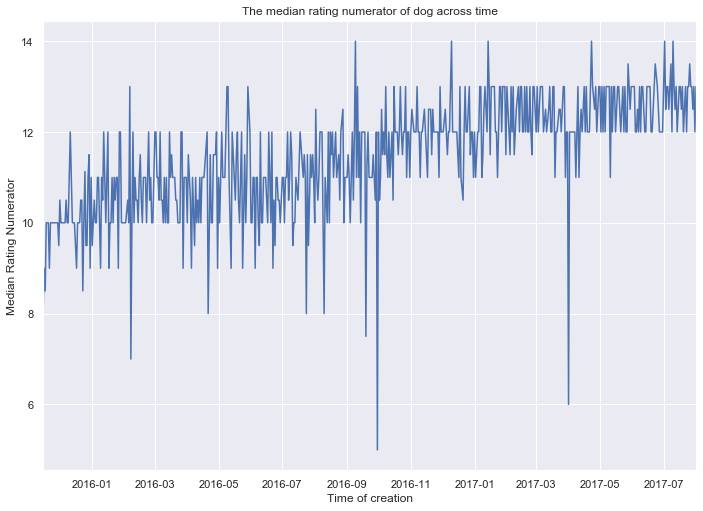

In [185]:
#Set a default size of graphs
sns.set(rc={'figure.figsize':(11.7,8.27)})
#Create time variable
final_df['created_at'] = pd.to_datetime(final_df.timestamp)

final_df.groupby(final_df['created_at'].dt.date).median()['rating_numerator'].plot()
plt.xlabel('Time of creation')
plt.ylabel('Median Rating Numerator')
plt.title('The median rating numerator of dog across time')

plt.show()

# There is any relation between rating_numerator and retweets of favorites?

In [186]:
final_df.corr()

tweet_id  rating_numerator  rating_denominator   p1_conf  \
tweet_id            1.000000          0.544031                 NaN  0.112550   
rating_numerator    0.544031          1.000000                 NaN  0.108134   
rating_denominator       NaN               NaN                 NaN       NaN   
p1_conf             0.112550          0.108134                 NaN  1.000000   
p1_dog              0.052143          0.133518                 NaN  0.089728   
p2_conf            -0.004696          0.001538                 NaN -0.539225   
p2_dog              0.056746          0.045025                 NaN  0.117166   
p3_conf            -0.055592         -0.044856                 NaN -0.732677   
p3_dog              0.020532          0.033827                 NaN  0.079258   
retweets            0.374652          0.307505                 NaN  0.053042   
favorites           0.601078          0.406601                 NaN  0.075434   

                      p1_dog   p2_conf    p2_dog   p3_conf    p3_dog  \
tweet_id            0.052143 -0.004696  0.056746 -0.055592  0.020532   
rating_numerator    0.133518  0.001538  0.045025 -0.044856  0.033827   
rating_denominator       NaN       NaN       NaN       NaN       NaN   
p1_conf             0.089728 -0.539225  0.117166 -0.732677  0.079258   
p1_dog              1.000000  0.100744  0.213736  0.016627  0.111019   
p2_conf             0.100744  1.000000  0.079687  0.477851  0.031204   
p2_dog              0.213736  0.079687  1.000000 -0.007387  0.085168   
p3_conf             0.016627  0.477851 -0.007387  1.000000  0.000107   
p3_dog              0.111019  0.031204  0.085168  0.000107  1.000000   
retweets           -0.016555 -0.015214 -0.007761 -0.041999 -0.009502   
favorites           0.004582 -0.017083  0.012149 -0.050904 -0.005875   

                    retweets  favorites  
tweet_id            0.374652   0.601078  
rating_numerator    0.307505   0.406601  
rating_denominator       NaN        NaN  
p1_conf             0.053042   0.075434  
p1_dog             -0.016555   0.004582  
p2_conf            -0.015214  -0.017083  
p2_dog             -0.007761   0.012149  
p3_conf            -0.041999  -0.050904  
p3_dog             -0.009502  -0.005875  
retweets            1.000000   0.930613  
favorites           0.930613   1.000000

#### If you see linear correlation matrix we see there is a low linear relation between rating_numerator and retweets  and between rating_numerators and favorites

Retweets and rating corr is 0.307505	

Favorites and rating corr is 0.406601	

# Let's do a scatter to see if there is a non linear relation

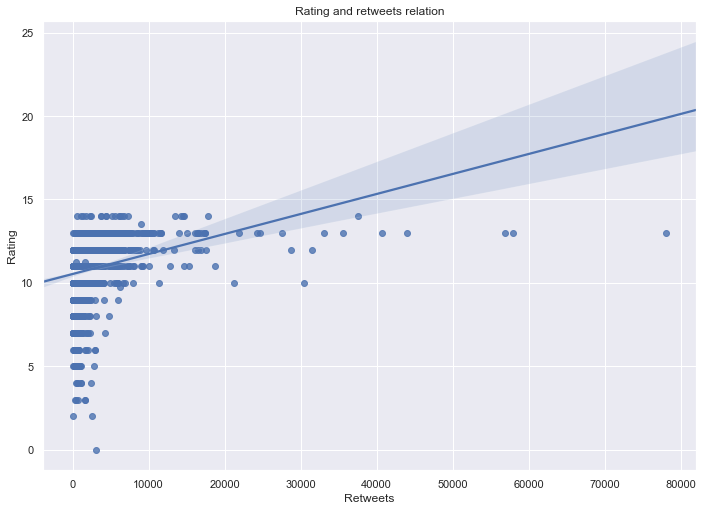

In [187]:
sns.regplot(x=final_df.retweets, y=final_df.rating_numerator)
plt.title("Rating and retweets relation")
plt.xlabel('Retweets')
plt.ylabel('Rating')
plt.show()


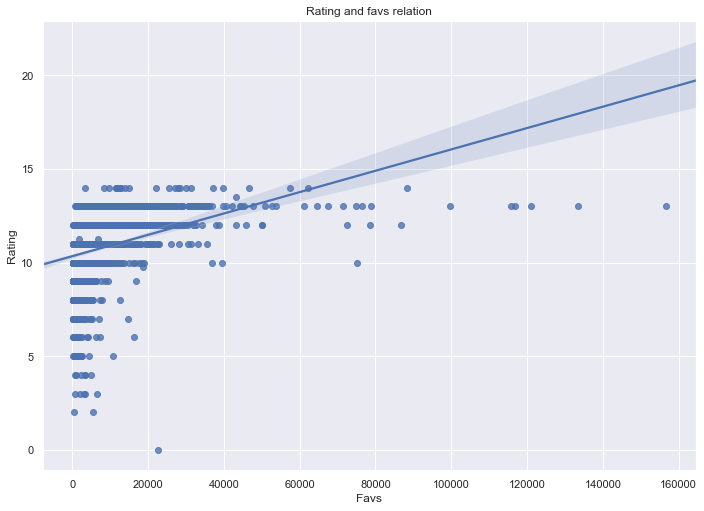

In [188]:
sns.regplot(x=final_df.favorites, y=final_df.rating_numerator)
plt.title("Rating and favs relation")
plt.xlabel('Favs')
plt.ylabel('Rating')
plt.show()

# With those scatters we can certify Rating Numerator doesn't have a significant statistical linear relation with Favorites and Retweets.

### Ok, but what about relation between retweets and favorites. First let's inspect variables. Then see relation

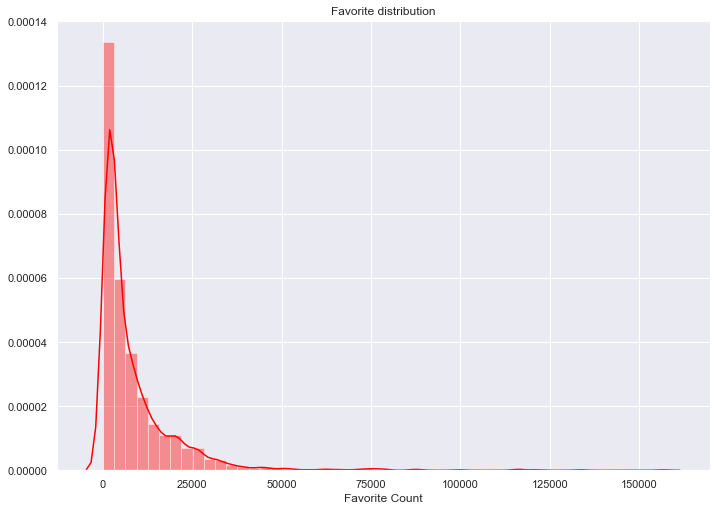

In [189]:

sns.distplot(final_df.favorites, color = 'red', axlabel='Favorite Count')
plt.title("Favorite distribution")

plt.show()

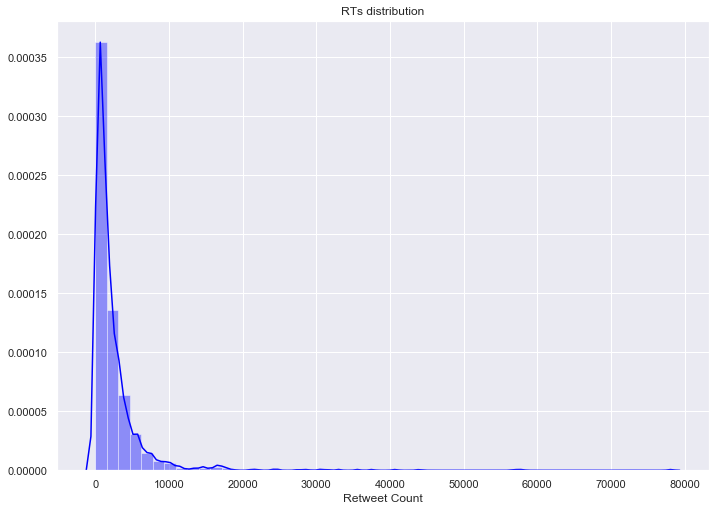

In [190]:
sns.distplot(final_df.retweets, color = 'blue', axlabel='Retweet Count')
plt.title("RTs distribution")

plt.show()

Favorites have a median near 4043 and RTs near 1243. But their shapes (in different scales obviously) look similar. Maybe there's a relation between variables

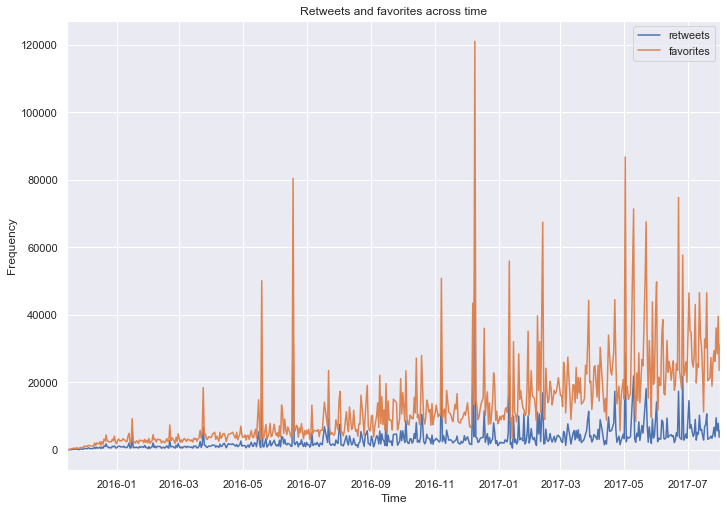

In [191]:
# Evolution in time

final_df.groupby(final_df['created_at'].dt.date).median()['retweets'].plot()
final_df.groupby(final_df['created_at'].dt.date).median()['favorites'].plot()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Retweets and favorites across time')

plt.show()

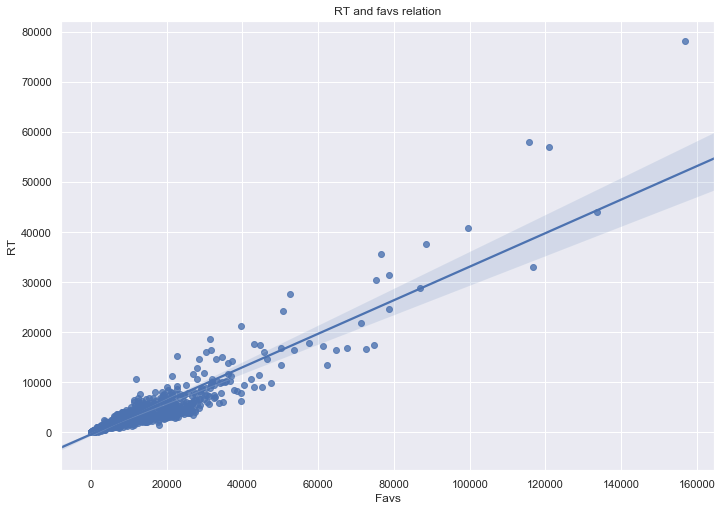

In [192]:
#Relation between favs and RT
sns.regplot(x=final_df.favorites, y=final_df.retweets)
plt.title("RT and favs relation")
plt.xlabel('Favs')
plt.ylabel('RT')
plt.show()

### That's a really significant relation of 0.93!

## Lastly, let's investigate p1, p2 and p3 confidence!

As you can see bellow, p1 confindence gives the most confidents results!

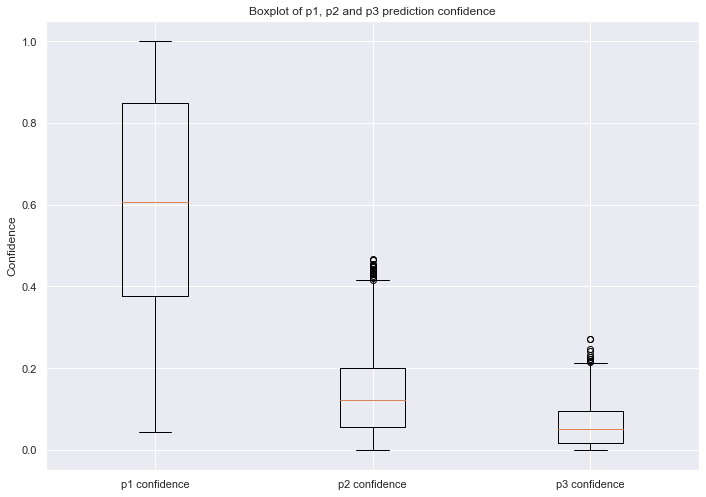

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    final_df.p1_conf[final_df.p1_conf.notnull()],
    final_df.p2_conf[final_df.p2_conf.notnull()],
    final_df.p3_conf[final_df.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of p1, p2 and p3 prediction confidence')
plt.ylabel('Confidence')
plt.show()